In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Para mostrar imágenes en el notebook
%matplotlib inline
# Para hacer las visualizaciones más grandes
plt.rcParams['figure.figsize'] = (10, 8)

Matplotlib is building the font cache; this may take a moment.


In [2]:
# Ruta al directorio de datos
DATA_DIR = "../data/raw"
TRAIN_DIR = os.path.join(DATA_DIR, "train")
TEST_DIR = os.path.join(DATA_DIR, "test")

In [3]:
# Ver las clases (emociones) disponibles
emotions = os.listdir(TRAIN_DIR)
print("Emociones disponibles:", emotions)

# Contar imágenes por emoción
for emotion in emotions:
    train_count = len(os.listdir(os.path.join(TRAIN_DIR, emotion)))
    test_count = len(os.listdir(os.path.join(TEST_DIR, emotion)))
    print(f"{emotion:10s}: {train_count:4d} training images, {test_count:4d} test images")

Emociones disponibles: ['happy', 'sad', 'fear', 'surprise', 'neutral', 'angry', 'disgust']
happy     : 7215 training images, 1774 test images
sad       : 4830 training images, 1247 test images
fear      : 4097 training images, 1024 test images
surprise  : 3171 training images,  831 test images
neutral   : 4965 training images, 1233 test images
angry     : 3995 training images,  958 test images
disgust   :  436 training images,  111 test images


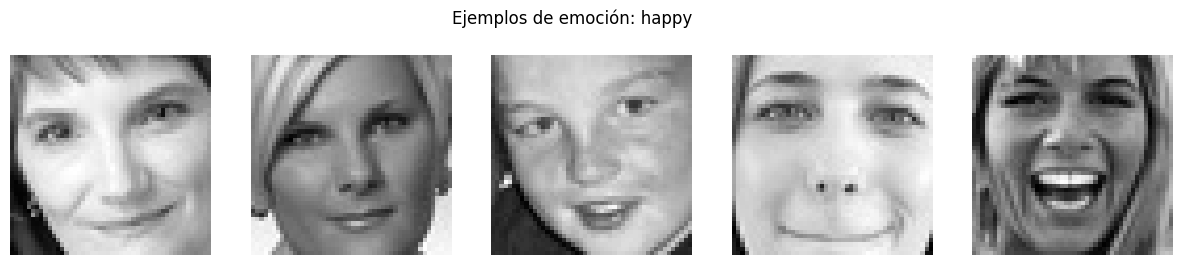

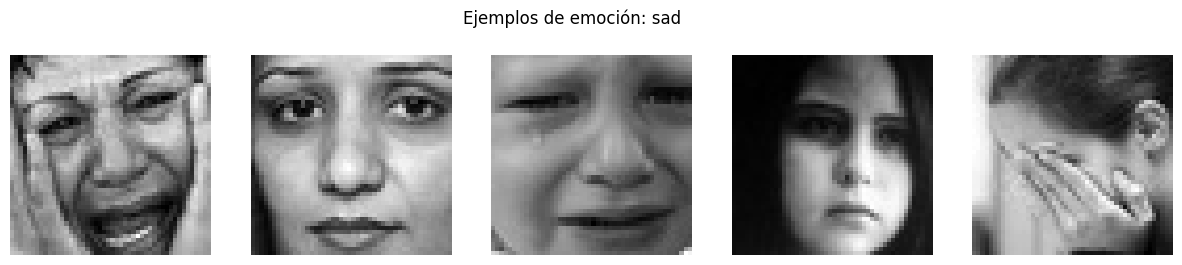

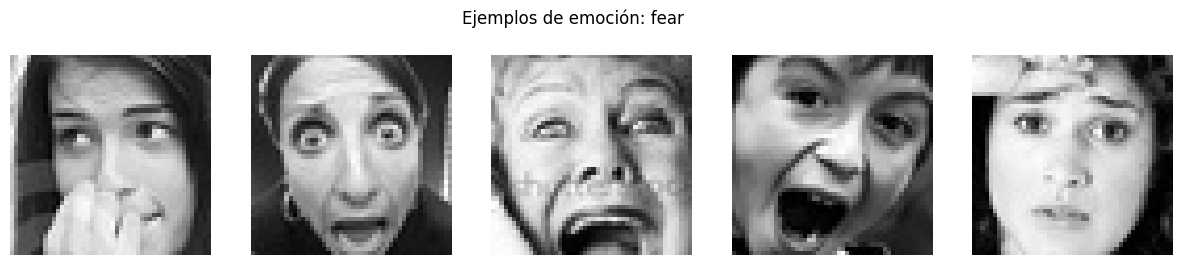

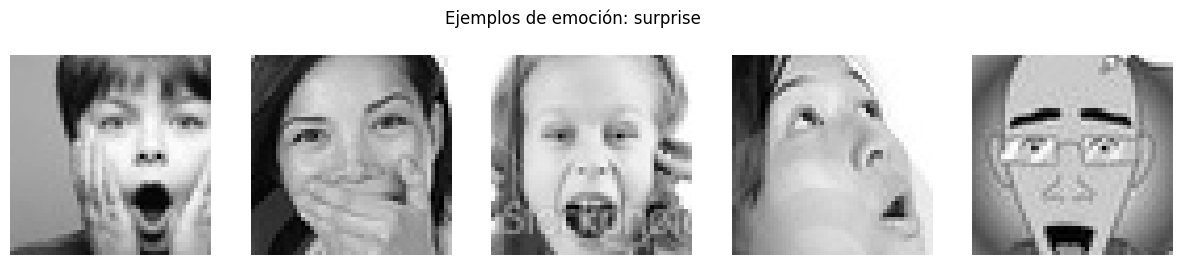

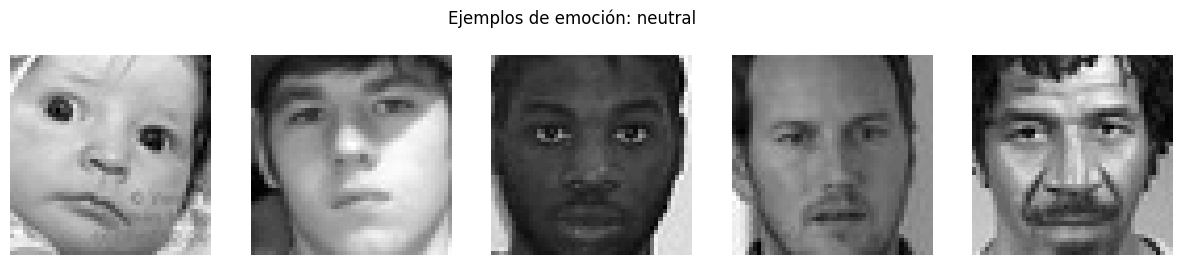

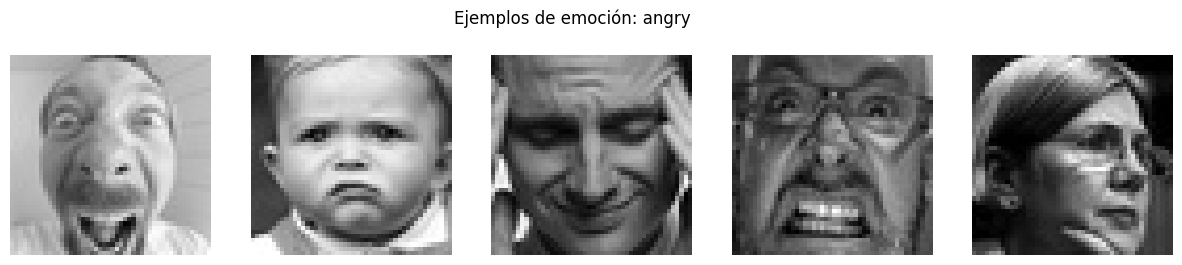

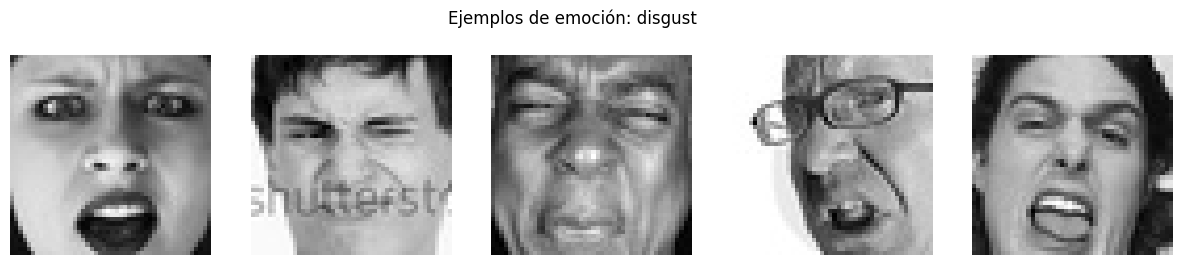

In [8]:
def show_examples(emotion, num_examples=5):
    """
    Muestra ejemplos de imágenes para una emoción específica
    """
    # Ruta a las imágenes de esta emoción
    emotion_path = os.path.join(TRAIN_DIR, emotion)
    # Lista de imágenes
    images = os.listdir(emotion_path)[:num_examples]
    
    fig, axes = plt.subplots(1, num_examples, figsize=(15, 3))
    for idx, img_name in enumerate(images):
        img_path = os.path.join(emotion_path, img_name)
        img = Image.open(img_path)
        axes[idx].imshow(img, cmap='gray')
        axes[idx].axis('off')
    plt.suptitle(f'Ejemplos de emoción: {emotion}')
    plt.show()

# Mostrar ejemplos para cada emoción
for emotion in emotions:
    show_examples(emotion)

In [10]:
def analyze_image_sizes(directory):
    """
    Analiza los tamaños de las imágenes en el dataset
    """
    sizes = []
    for emotion in os.listdir(directory):
        emotion_path = os.path.join(directory, emotion)
        # Tomamos algunas imágenes de ejemplo de cada emoción
        for img_name in os.listdir(emotion_path):
            img_path = os.path.join(emotion_path, img_name)
            with Image.open(img_path) as img:
                sizes.append(img.size)
    
    # Convertimos a set para ver tamaños únicos
    unique_sizes = set(sizes)
    print(f"Tamaños únicos encontrados: {unique_sizes}")
    return sizes

def analyze_class_distribution(directory):
    """
    Analiza la distribución de imágenes por clase (emoción)
    """
    distribution = {}
    total_images = 0
    
    for emotion in os.listdir(directory):
        emotion_path = os.path.join(directory, emotion)
        num_images = len(os.listdir(emotion_path))
        distribution[emotion] = num_images
        total_images += num_images
    
    # Calcular porcentajes
    percentages = {emotion: (count/total_images)*100 
                  for emotion, count in distribution.items()}
    
    # Visualizar distribución
    plt.figure(figsize=(12, 6))
    plt.bar(distribution.keys(), distribution.values())
    plt.title('Distribución de imágenes por emoción')
    plt.xlabel('Emoción')
    plt.ylabel('Número de imágenes')
    plt.xticks(rotation=45)
    
    # Mostrar números y porcentajes
    for emotion in distribution:
        print(f"{emotion:10s}: {distribution[emotion]:4d} imágenes "
              f"({percentages[emotion]:.1f}%)")
    
    plt.show()
    return distribution, percentages



In [11]:
# Analizar tamaños en conjunto de entrenamiento
print("Analizando tamaños en conjunto de entrenamiento:")
train_sizes = analyze_image_sizes(TRAIN_DIR)

Analizando tamaños en conjunto de entrenamiento:
Tamaños únicos encontrados: {(48, 48)}



Distribución de clases en conjunto de entrenamiento:
happy     : 7215 imágenes (25.1%)
sad       : 4830 imágenes (16.8%)
fear      : 4097 imágenes (14.3%)
surprise  : 3171 imágenes (11.0%)
neutral   : 4965 imágenes (17.3%)
angry     : 3995 imágenes (13.9%)
disgust   :  436 imágenes (1.5%)


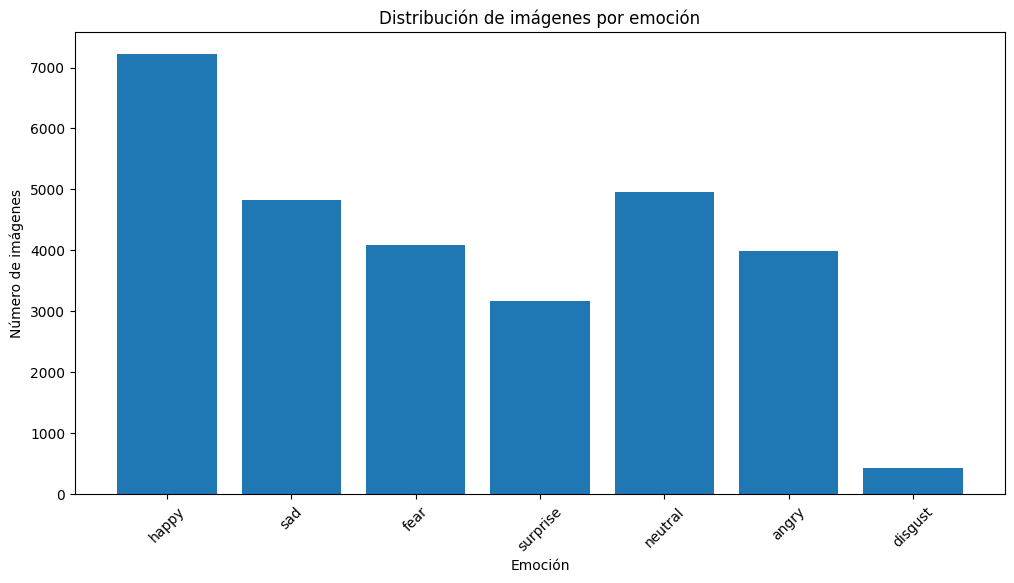

In [12]:
# Analizar distribución en conjunto de entrenamiento
print("\nDistribución de clases en conjunto de entrenamiento:")
train_dist, train_pct = analyze_class_distribution(TRAIN_DIR)